In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [5]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


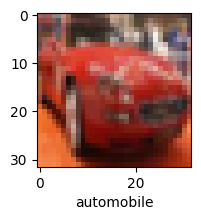

In [7]:
plot_sample(X_train, y_train, 5)

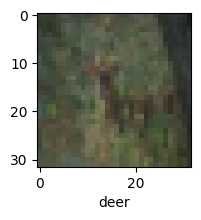

In [8]:
plot_sample(X_train, y_train, 10)

In [9]:
#We normalize images

X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #if it was binary classification, we would use sigmoid
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn.fit(X_train, y_train, epochs=10) #training the model

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3795 - loss: 1.7035
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 39ms/step - accuracy: 0.5901 - loss: 1.1642
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6445 - loss: 1.0246
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6724 - loss: 0.9337
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7012 - loss: 0.8575
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7213 - loss: 0.8015
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 44ms/step - accuracy: 0.7342 - loss: 0.7591
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.7541 - loss: 0.7018
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7657 - loss: 0.6657
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7780 - loss: 0.6333


In [13]:
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=1) #evaluating the model

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6903 - loss: 0.9494
Test loss: 0.9637556672096252
Test accuracy: 0.6850000023841858


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: ship
Actual class: ship


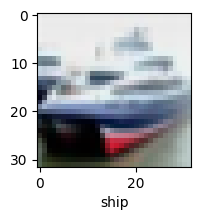

In [18]:
test_image_index = 1

plot_sample(X_test, y_test, test_image_index)

# Make a prediction
predicted_probabilities = cnn.predict(X_test[test_image_index].reshape(1, 32, 32, 3))
predicted_class = np.argmax(predicted_probabilities)

print(f"Predicted class: {classes[predicted_class]}")
print(f"Actual class: {classes[y_test[test_image_index]]}")

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred_classes, target_names=classes)
print("\nClassification Report:")
print(cr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Confusion Matrix:
[[664  36  54  18  26   8  17   3  92  82]
 [  6 794   4   6   2   7   5   2  22 152]
 [ 55  11 548  61  66  88 107  23  17  24]
 [ 11  15  50 460  68 209 100  22  22  43]
 [ 12  11  56  73 602  45 116  53  12  20]
 [ 12   6  50 125  57 637  32  43  11  27]
 [  2   7  28  51  19  33 817   3  11  29]
 [  9   6  30  38  90  95  13 656   4  59]
 [ 44  42   5   9   8  10   7   2 800  73]
 [  4  58   3  10   4  10   9   8  22 872]]

Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.66      0.73      1000
  automobile       0.81      0.79      0.80      1000
        bird       0.66      0.55      0.60      1000
         cat       0.54      0.46      0.50      1000
        deer       0.64      0.60      0.62      1000
         dog       0.56      0.64      0.59      1000
        frog       0.67      0.82      0.74      1000
       horse       0.80      0.66      0.72      100